## David Zagaceta

## Homework 5 

## Solution to the 5th Legendre Polynomial via the shooting method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The differential equation for the legendre polynomial is given by:

$$ y'' = \frac{1}{(1-t^2)} [2ty'-n(n+1)y] $$

We can turn this second order differential equation into two first order a system of 2 first order odes.

$$x_2 = y'$$

$$x_1 = y$$

$$x_2 = y' = x'_1$$

$$x'_2 = y'' = Ax_2 + Bx_1$$

the system becomes

$$x'_1 = x_2$$

$$x'_2 = \frac{1}{1-t^2} [2tx_2-n(n+1)x_1]$$

where n = 5 

$$x'_2 = \frac{1}{1-t^2} [2tx_2-30x_1]$$

initial and boundary conditions

$x_1(0)=0$

$x_2(0) = ?$

$x_1(1) = 1$

In [2]:
def solvr(y,t):
    '''the system of first order odes for the 5th term of the set of legendre polynomials'''
    return(y[1],(1.0/(1.0-t**2))*(2.0*t*y[1]-30.0*y[0]))

found at  2 iterations


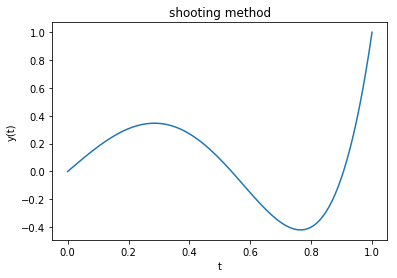

In [3]:
maxiter = 100
dymin = 0
dymax = 5
t = np.linspace(0,1,100)
for i in range(maxiter):
    y0 = [0.0,(dymax+dymin)/2]
    x = odeint(solvr, y0, t)
    if np.abs(x[-1,0]-1) <= 0.01:
        print('found at ',i,'iterations')
        break
    if x[-1,0] < 1:
        dymin = y0[1]
    else:
        dymax = y0[1]
    
plt.plot(t,x[:,0])
plt.title('shooting method')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.show()

In [4]:
print(x)

[[  0.00000000e+00   1.87500000e+00]
 [  1.89303847e-02   1.87232212e+00]
 [  3.78066798e-02   1.86429338e+00]
 [  5.65749098e-02   1.85092852e+00]
 [  7.51812909e-02   1.83225216e+00]
 [  9.35723373e-02   1.80829873e+00]
 [  1.11694968e-01   1.77911249e+00]
 [  1.29496576e-01   1.74474755e+00]
 [  1.46925164e-01   1.70526786e+00]
 [  1.63929448e-01   1.66074719e+00]
 [  1.80458917e-01   1.61126918e+00]
 [  1.96463961e-01   1.55692727e+00]
 [  2.11895963e-01   1.49782476e+00]
 [  2.26707398e-01   1.43407479e+00]
 [  2.40851936e-01   1.36580032e+00]
 [  2.54284536e-01   1.29313416e+00]
 [  2.66961550e-01   1.21621896e+00]
 [  2.78840821e-01   1.13520720e+00]
 [  2.89881781e-01   1.05026121e+00]
 [  3.00045552e-01   9.61553138e-01]
 [  3.09295042e-01   8.69264983e-01]
 [  3.17595051e-01   7.73588581e-01]
 [  3.24912364e-01   6.74725603e-01]
 [  3.31215853e-01   5.72887558e-01]
 [  3.36476577e-01   4.68295793e-01]
 [  3.40667880e-01   3.61181493e-01]
 [  3.43765490e-01   2.51785679e-01]
 

## Relaxation Method

In this we will use 5 nodes, at 0, 0.2, 0.4, 0.8, and 1.0 and solve the differential equation at each


$$ y'' = \frac{1}{(1-t^2)} [2ty'-n(n+1)y] $$

$$ y'' = \frac{y_{i-1}-2y_i+y_{i+1}}{\Delta t^2}$$

$$ y' = \frac{y_{i+1}-y_{i-1}}{2\Delta t}$$

then the differential equation becomes

$$ \frac{y_{i-1}-2y_i+y_{i+1}}{\Delta t^2} = \frac{1}{(1-t^2)} [2t\frac{y_{i+1}-y_{i-1}}{2\Delta t}-n(n+1)y_i] $$

when n = 5 and $\Delta t = 0.2$

$$ \frac{y_{i-1}-2y_i+y_{i+1}}{0.04} = \frac{1}{(1-t^2)} [t\frac{y_{i+1}-y_{i-1}}{0.2}-30y_i] $$

$$ (1-t^2)\frac{y_{i-1}-2y_i+y_{i+1}}{0.04} = t\frac{y_{i+1}-y_{i-1}}{0.2}-30y_i $$

$$ 5(1-t^2)(y_{i-1}-2y_i+y_{i+1}) = t(y_{i+1}-y_{i-1})-6y_i $$

$$ (-4+10t^2)y_i + (t-5t^2+5)y_{i-1} + (5-t-t^2)y_{i+1} = 0 $$

Now we will set up equations for each of the nodes 

for i = 1

$ y_1 = 0 $

for i = 2

$ -\frac{18}{5}y_{2} + \frac{119}{25}y_{3} = 0 $

for i = 3

$ -\frac{12}{5}y_{3} + \frac{23}{5}y_{2} + \frac{111}{25}y_{4} = 0 $

for i = 4

$ -\frac{2}{5}y_{4} + \frac{19}{5}y_{3} + \frac{101}{25}y_{5} = 0 $

for i = 5

$ \frac{12}{5}y_{5} + \frac{13}{5}y_{4} + \frac{89}{25} = 0 $

for i = 6

$ y_6 = 1 $

In [5]:
from sympy import *
y1, y2, y3, y4, y5, y6 = symbols('y1, y2, y3, y4, y5, y6')

In [6]:
e1 = y1
e2 = -18/5*y2 + 119/25*y3
e3 = 23/5*y2 - 12/5*y3 + 111/25*y4
e4 = 19/5*y3 - 2/5*y4 + 101/25*y5
e5 = 13/5*y4 + 12/5*y5 + 89/25
e6 = y6 - 1 

#defining the function vector and creating an empty matrix for the jacobian

E = Matrix([[e1],[e2],[e3],[e4],[e5],[e6]])
J = np.zeros([6,6])
J = Matrix(J)
y = [y1, y2, y3, y4, y5, y6]

In [7]:
# taking the jacobian of the function vector

for i in range(6):
    for j in range(6):
        J[i,j] = diff(E[i],y[j])

In [8]:
#creating functions for the function vector and jacobian matrix

e = lambdify([y1,y2,y3,y4,y5,y6],E)
j = lambdify([y1,y2,y3,y4,y5,y6],J)

In [9]:
def ODE_system(E, J, y1, y2, y3, y4, y5, y6, eps):
    '''relaxation method'''
    import numpy as np
    E_value = E(y1,y2,y3,y4,y5,y6).astype(np.float64)
    E_norm = np.linalg.norm(E_value)
    counter = 0
    while abs(E_norm) > eps and counter < 1000:
        J_value = J(y1,y2,y3,y4,y5,y6).astype(np.float64)
        delta = np.linalg.solve(J_value,-E_value)
        y1 = float(y1 + delta[0])
        y2 = float(y2 + delta[1])
        y3 = float(y3 + delta[2])
        y4 = float(y4 + delta[3])
        y5 = float(y5 + delta[4])
        y6 = float(y6 + delta[5])
        E_value = E(y1,y2,y3,y4,y5,y6).astype(np.float64)
        E_norm = np.linalg.norm(E_value)
        counter += 1
    if abs(E_norm) > eps:
        return 'failed'
    #print('it took ',counter,' iterations to find the zero')
    y = [y1,y2,y3,y4,y5,y6]
    return y

In [10]:
y = ODE_system(e,j,1.0,1.0,1.0,1.0,1.0,1.0, 10**(-14))

In [11]:
t = [0.0,0.2,0.4,0.6,0.8,1.0]

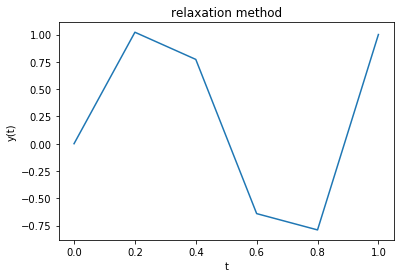

In [12]:
plt.plot(t,y)
plt.title('relaxation method')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

In [14]:
from scipy import interpolate
tck = interpolate.splrep(t, y, s=0)
tnew = np.linspace(0,1,1000)
ynew = interpolate.splev(tnew, tck, der=0)

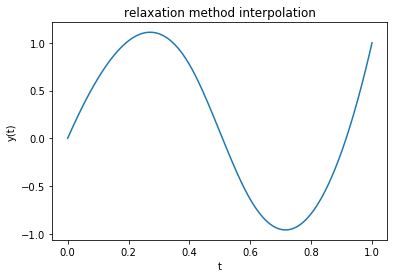

In [15]:
plt.plot(tnew,ynew)
plt.title('relaxation method interpolation')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

## If i had chosen more nodes for the finite difference method I would have come closer to the actual solution